# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data

### Load
- Load the data into pandas dataframes

In [2]:
data_df = pd.read_csv('./data/processed_data.csv')

In [3]:
data_df.head()

,Participant,Age,Native Language,languages_other_english,Gender,Religiosity,Major,major_standardized,College,nigger,...,excrement,semen,breasts,coitus,booty,pee,butt,climax,randy,cunt
0,1,20,"English, Mandarin",1,Male,1.0,"Psychology, Specialized in Clinical Psyc",social_science,Warren,1,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
1,2,18,"English, Chaldean",1,Male,1.0,Visual arts media,arts_humanities,Sixth,1,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2,3,21,"English, Armenian",1,Male,3.0,Communications,social_science,Roosevelt,3,...,NaN,1.0,1,NaN,1.0,1.0,1,1.0,NaN,1.0
3,4,20,English,0,Male,1.0,Cognitive Science,multi_interdisciplinary,Revelle,9,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,NaN,1.0
4,5,22,English,0,Male,1.0,ICAM,multi_interdisciplinary,Warren,9,...,1.0,1.0,1,1.0,3.0,1.0,1,1.0,1.0,3.0


In [4]:
data_df.columns

Index(['Participant', 'Age', 'Native Language', 'languages_other_english',
       'Gender', 'Religiosity', 'Major', 'major_standardized', 'College',
       'nigger',
       ...
       'excrement', 'semen', 'breasts', 'coitus', 'booty', 'pee', 'butt',
       'climax', 'randy', 'cunt'],
      dtype='object', length=101)

In [5]:
len(list(data_df.columns))

101

Load word vectors from Glove

In [6]:
# https://gist.github.com/sebtheiler/84a0c5afac04f7e602de350ddca94859#file-loading_vectors_full-py
embeddings_dict = {}
with open("./data/glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [7]:
list(embeddings_dict.keys())[100:110]

['so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many']

In [8]:
print(embeddings_dict.get('lesbo'))

None


In [9]:
categorize_df = pd.read_csv('./data/word_categorization.csv')

In [10]:
categorize_df.head()

,word,religion,sex,body,excretion,slur,insult,formal,closed
0,nigger,0,0,0,0,1,1,0,0
1,fag,0,0,0,0,1,1,0,1
2,cocksucker,0,1,1,0,0,1,0,0
3,chink,0,0,0,0,1,1,0,1
4,motherfucker,0,1,0,0,0,1,0,0


### Examine

- visualize the data

<AxesSubplot: title={'center': 'Age'}>

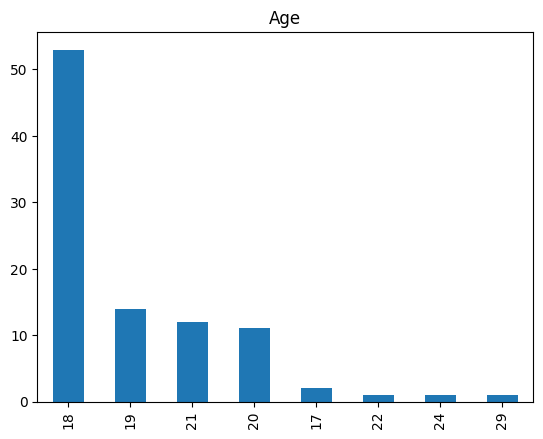

In [11]:
data_df['Age'].value_counts().plot(kind='bar', title='Age')

<AxesSubplot: title={'center': 'Gender'}>

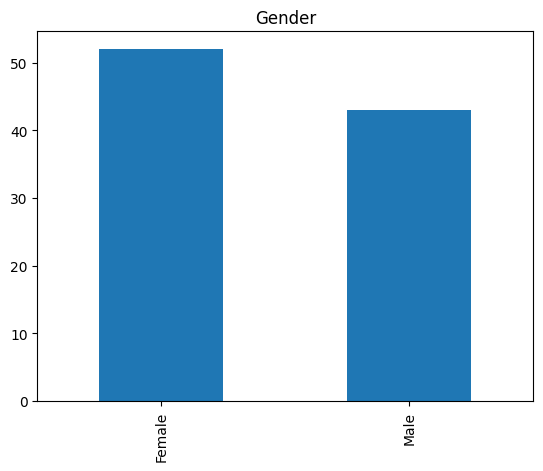

In [12]:
data_df['Gender'].value_counts().plot(kind='bar', title='Gender')

<AxesSubplot: title={'center': 'Major'}>

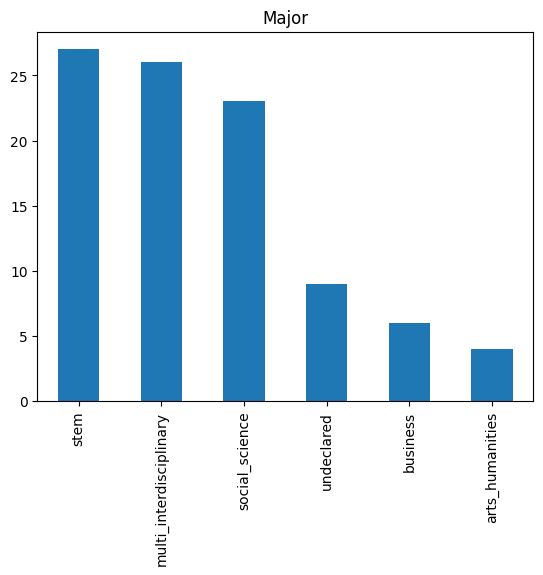

In [13]:
data_df['major_standardized'].value_counts().plot(kind='bar', title='Major')

<AxesSubplot: title={'center': 'Religiosity'}>

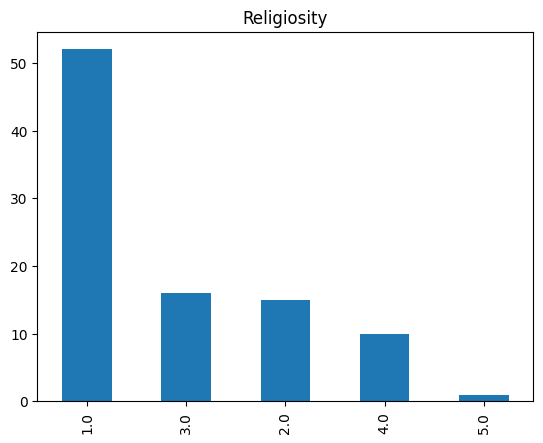

In [14]:
data_df['Religiosity'].value_counts().plot(kind='bar', title='Religiosity')

<AxesSubplot: title={'center': 'College'}>

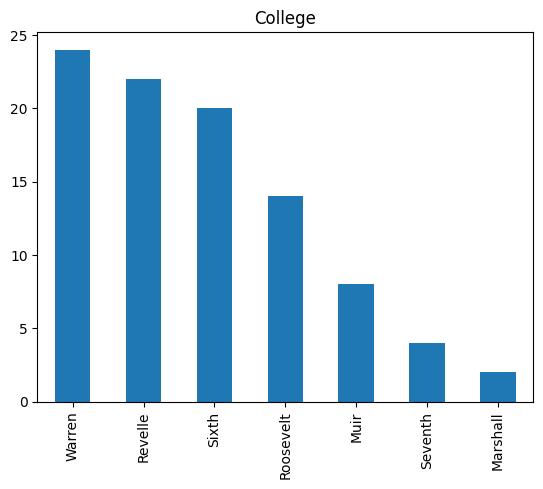

In [15]:
data_df['College'].value_counts().plot(kind='bar', title='College')

<AxesSubplot: title={'center': 'Num. of languages other than English'}>

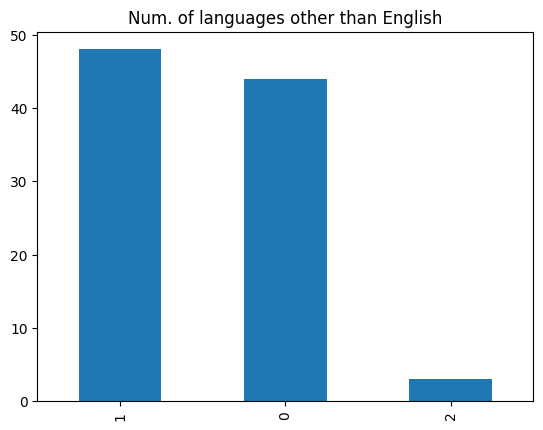

In [16]:
data_df['languages_other_english'].value_counts().plot(kind='bar', title='Num. of languages other than English')

### Reformatting and Feature Creation

- split data into individual words
- join word categorizations
- add syllable count
- add consonant and vowel count and word length

In [17]:
# https://stackoverflow.com/questions/46759492/syllable-count-in-python
# not perfect, but accurate for the profanity selection
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [18]:
# https://stackoverflow.com/questions/19967001/count-vowels-in-string-python
def vowel_count(word):
    num_vowels=0
    for char in word:
        if char.lower() in "aeiou":
           num_vowels += 1
    return num_vowels

In [19]:
def letter_count(words):
    return len(words)

compile word embeddings for relevant words

In [20]:
def compile_word_vectors(words):
    compiled_data = []
    final_columns = [
        'word',
        'syllables',
        'vowels',
        'letters',
    ]
    # each word vector has 50 dimensions
    for i in range(50):
        final_columns.append(f'v_{i}')
    
    for word in words:
        # skip words that are not part of the pre-trained set
        if embeddings_dict.get(word) is None:
            continue
        
        syllables = syllable_count(word)
        vowels = vowel_count(word)
        letters = letter_count(word)
        
        word_data = [
            word,
            syllables,
            vowels,
            letters,
        ]
        
        for value in embeddings_dict[word]:
            word_data.append(value)
        
        compiled_data.append(word_data)
    
    return pd.DataFrame(compiled_data, columns=final_columns)
        

In [21]:
compile_word_vectors(list(data_df.columns)[9:])['word'].value_counts()

nigger       1
crap         1
fornicate    1
vagina       1
damn         1
            ..
moron        1
hooker       1
dick         1
goddamn      1
cunt         1
Name: word, Length: 84, dtype: int64

In [22]:
len(list(data_df.columns)[9:])

92

Check missing words

In [23]:
word_vectors = compile_word_vectors(list(data_df.columns)[9:])
for word in list(data_df.columns)[9:]:
    if word not in word_vectors['word'].values:
        print(word)

cocksucker
buttfuck
shithead
lesbo
nutsack
rimjob
blowjob
clit


format data into a regression or multi-class classification problem where each word is represented with a row with many features

In [24]:
def reformat_data(regression=True):
    formatted_data = []
    data_columns = list(data_df.columns)
    
    output_columns = [
        'participant',
        'age',
        'langs_other_than_eng',
        'gender',
        'religiosity',
        'major',
        'college',
        'word',
        'rating',
    ]
    
    for index, row in data_df.iterrows():
        # grab sample features
        participant = row['Participant']
        age = row['Age']
        langs_other_than_eng = row['languages_other_english']
        gender = row['Gender']
        religiosity = row['Religiosity']
        major = row['major_standardized']
        college = row['College']
        
        # create a sample for each word
        for word_index in range(9, 101):
            word = data_columns[word_index]
            
            # skip words without vectors
            if word not in word_vectors['word'].values:
                continue
            
            rating_raw = row[word]
            
            # initialize sample without dependent variable
            sample = [
                participant,
                age,
                langs_other_than_eng,
                gender,
                religiosity,
                major,
                college,
                word,
            ]
            
            # add dependent variable label
            if regression is True:
                # ignore empty responses for regression
                if np.isnan(rating_raw):
                    continue
                
                rating = int(rating_raw)
                
                sample.append(rating)
                
                
            else:
                rating = 0
                if not np.isnan(rating_raw):
                    rating = int(rating_raw)
                sample.append(rating)
            
            # add sample to final data
            formatted_data.append(sample)   
    
    # convert data to pandas DataFrame
    formatted_data_df = pd.DataFrame(formatted_data, columns=output_columns)
    # join word vector and additional features and return
    additional_features_df = compile_word_vectors(list(data_df.columns)[9:])
    data_vector = pd.merge(formatted_data_df, additional_features_df, on='word')
    # join categorizations
    return pd.merge(data_vector, categorize_df, on='word')
    

In [25]:
reformat_data().head()

,participant,age,langs_other_than_eng,gender,religiosity,major,college,word,rating,syllables,...,v_48,v_49,religion,sex,body,excretion,slur,insult,formal,closed
0,1,20,1,Male,1.0,social_science,Warren,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
1,2,18,1,Male,1.0,arts_humanities,Sixth,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
2,3,21,1,Male,3.0,social_science,Roosevelt,nigger,3,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
3,4,20,0,Male,1.0,multi_interdisciplinary,Revelle,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
4,5,22,0,Male,1.0,multi_interdisciplinary,Warren,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0


In [26]:
na_count = reformat_data().isna().sum()
na_count[na_count > 0]

religiosity    84
college        81
dtype: int64

### Preprocessing
Initialize Sci-Kit preprocessing pipelines

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [28]:
# impute and standard scale
numerical_fields = ['age', 'langs_other_than_eng', 'religiosity', 'syllables', 'vowels', 'letters'] + [f'v_{i}' for i in range(50)]

In [29]:
# one hot encode
one_hot_fields = ['gender', 'major']

In [30]:
# pass through without preprocessing
pass_through_fields = ['sex', 'body', 'excretion', 'slur', 'insult', 'formal', 'closed']

In [31]:
numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scale', StandardScaler())
])

In [32]:
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_fields),
    ('ohe', OneHotEncoder(), one_hot_fields),
    ('pass', 'passthrough', pass_through_fields)
], sparse_threshold=0)

# Statsmodels - Regression
Analysis using Ordinary Least Squares with Statsmodels

In [33]:
regression_data_df = reformat_data()

In [34]:
regression_data_df.head()

,participant,age,langs_other_than_eng,gender,religiosity,major,college,word,rating,syllables,...,v_48,v_49,religion,sex,body,excretion,slur,insult,formal,closed
0,1,20,1,Male,1.0,social_science,Warren,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
1,2,18,1,Male,1.0,arts_humanities,Sixth,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
2,3,21,1,Male,3.0,social_science,Roosevelt,nigger,3,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
3,4,20,0,Male,1.0,multi_interdisciplinary,Revelle,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
4,5,22,0,Male,1.0,multi_interdisciplinary,Warren,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0


In [35]:
X = regression_data_df.drop(['rating'], axis=1)
y = regression_data_df['rating']

In [36]:
X.shape

(7360, 69)

In [37]:
y.shape

(7360,)

In [38]:
X_processed = full_pipeline.fit_transform(X)

re-convert to pandas dataframe to preserve feature names

In [39]:
X_processed_df = pd.DataFrame(X_processed, columns=full_pipeline.get_feature_names_out())

In [40]:
X_processed_df.head()

,num__age,num__langs_other_than_eng,num__religiosity,num__syllables,num__vowels,num__letters,num__v_0,num__v_1,num__v_2,num__v_3,...,ohe__major_social_science,ohe__major_stem,ohe__major_undeclared,pass__sex,pass__body,pass__excretion,pass__slur,pass__insult,pass__formal,pass__closed
0,0.616088,0.783882,-0.765381,0.434957,0.157025,0.307905,-1.000794,0.147214,-0.245671,-0.504823,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.587790,0.783882,-0.765381,0.434957,0.157025,0.307905,-1.000794,0.147214,-0.245671,-0.504823,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.218027,0.783882,1.056777,0.434957,0.157025,0.307905,-1.000794,0.147214,-0.245671,-0.504823,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.616088,-1.024132,-0.765381,0.434957,0.157025,0.307905,-1.000794,0.147214,-0.245671,-0.504823,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.819966,-1.024132,-0.765381,0.434957,0.157025,0.307905,-1.000794,0.147214,-0.245671,-0.504823,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
ols_mdl = sm.OLS(y, sm.add_constant(X_processed_df))

In [42]:
ols_mdl_fit = ols_mdl.fit()

In [43]:
ols_mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     74.01
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:04:37   Log-Likelihood:                -14047.
No. Observations:                7360   AIC:                         2.823e+04
Df Residuals:                    7290   BIC:                         2.872e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.0934      0.065     16.862      0.000       0.966       1.221
num__age                               0.2818      0.020     13.929      0.000       0.242       0.321
num__langs_other_than_eng             -0.0999      0.020     -4.916      0.000      -0.140      -0.060
num__religiosity                       0.1677      0.020      8.447      0.000       0.129       0.207
num__syllables                        -0.1206      0.100     -1.209      0.227      -0.316       0.075
num__vowels                            0.0328      0.104      0.317      0.752      -0.170       0.236
num__letters                           0.3015      0.075      3.996      0.000       0.154       0.449
num__v_0                               0.1737      0.103      1.686      0.092      -0.028       0.376
num__v_1                               0.9637      0.135      7.131      0.000       0.699       1.229
num__v_2                              -0.6052      0.142     -4.259      0.000      -0.884      -0.327
num__v_3                              -0.1016      0.144     -0.708      0.479      -0.383       0.180
num__v_4                               0.5354      0.132      4.061      0.000       0.277       0.794
num__v_5                              -0.1019      0.087     -1.167      0.243      -0.273       0.069
num__v_6                              -0.6837      0.187     -3.651      0.000      -1.051      -0.317
num__v_7                              -0.0059      0.141     -0.042      0.966      -0.282       0.270
num__v_8                              -0.2909      0.072     -4.021      0.000      -0.433      -0.149
num__v_9                               0.3085      0.165      1.864      0.062      -0.016       0.633
num__v_10                              1.7255      0.323      5.340      0.000       1.092       2.359
num__v_11                             -0.9303      0.194     -4.801      0.000      -1.310      -0.550
num__v_12                             -1.5116      0.264     -5.717      0.000      -2.030      -0.993
num__v_13                             -0.8884      0.131     -6.773      0.000      -1.146      -0.631
num__v_14                             -1.2024      0.241     -4.995      0.000      -1.674      -0.731
num__v_15                             -0.5394      0.149     -3.620      0.000      -0.831      -0.247
num__v_16                             -0.0780      0.087     -0.892      0.372      -0.249       0.093
num__v_17                             -0.2194      0.180     -1.217      0.224      -0.573       0.134
num__v_18                              0.6078      0.126      4.826      0.000       0.361       0.855
num__v_19                              0.1158      0.165      0.702      0.483      -0.208      

In [44]:
ols_mdl_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                   OLS                   Adj. R-squared:          0.406     
Dependent Variable:      rating                AIC:                     28234.8344
Date:                    2022-11-20 17:04      BIC:                     28718.1014
No. Observations:        7360                  Log-Likelihood:          -14047.   
Df Model:                69                    F-statistic:             74.01     
Df Residuals:            7290                  Prob (F-statistic):      0.00      
R-squared:               0.412                 Scale:                   2.6883    
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
const                               1.0934   0.0648 16.8624 0.0000  0.9663  1.2205
num__age                            0.2818   0.0202 13.9292 0.0000  0.2421  0.3214
num__langs_other_than_eng          -0.0999   0.0203 -4.9163 0.0000 -0.1398 -0.0601
num__religiosity                    0.1677   0.0198  8.4468 0.0000  0.1288  0.2066
num__syllables                     -0.1206   0.0998 -1.2085 0.2269 -0.3162  0.0750
num__vowels                         0.0328   0.1037  0.3166 0.7516 -0.1704  0.2361
num__letters                        0.3015   0.0754  3.9964 0.0001  0.1536  0.4493
num__v_0                            0.1737   0.1030  1.6858 0.0919 -0.0283  0.3756
num__v_1                            0.9637   0.1351  7.1313 0.0000  0.6988  1.2286
num__v_2                           -0.6052   0.1421 -4.2592 0.0000 -0.8838 -0.3267
num__v_3                           -0.1016   0.1435 -0.7077 0.4792 -0.3829  0.1798
num__v_4                            0.5354   0.1318  4.0613 0.0000  0.2770  0.7938
num__v_5                           -0.1019   0.0873 -1.1672 0.2432 -0.2729  0.0692
num__v_6                           -0.6837   0.1872 -3.6513 0.0003 -1.0508 -0.3166
num__v_7                           -0.0059   0.1406 -0.0422 0.9664 -0.2816  0.2697
num__v_8                           -0.2909   0.0723 -4.0211 0.0001 -0.4327 -0.1491
num__v_9                            0.3085   0.1655  1.8643 0.0623 -0.0159  0.6329
num__v_10                           1.7255   0.3231  5.3404 0.0000  1.0921  2.3589
num__v_11                          -0.9303   0.1938 -4.8006 0.0000 -1.3102 -0.5504
num__v_12                          -1.5116   0.2644 -5.7167 0.0000 -2.0299 -0.9933
num__v_13                          -0.8884   0.1312 -6.7731 0.0000 -1.1455 -0.6313
num__v_14                          -1.2024   0.2407 -4.9950 0.0000 -1.6744 -0.7305
num__v_15                          -0.5394   0.1490 -3.6203 0.0003 -0.8314 -0.2473
num__v_16                          -0.0780   0.0874 -0.8921 0.3724 -0.2494  0.0934
num__v_17                          -0.2194   0.1803 -1.2168 0.2237 -0.5728  0.1340
num__v_18                           0.6078   0.1259  4.8260 0.0000  0.3609  0.8547
num__v_19                           0.1158   0.1650  0.7016 0.4830 -0.2077  0.4393
num__v_20                           1.1624   0.1914  6.0746 0.0000  0.7873  1.5375
num__v_21                          -1.4036   0.2281 -6.1542 0.0000 -1.8506 -0.9565
num__v_22                           1.0580   0.1852  5.7115 0.0000  0.6949  1.4211
num__v_23                          -0.3448   0.1781 -1.9360 0.0529 -0.6938  0.0043
num__v_24                           1.0724   0.2326  4.6102 0.0000  0.6164  1.5284
num__v_25                           0.4329   0.2066  2.0954 0.0362  0.0279  0.8379
num__v_26                           0.1822   0.0977  1.8653 0.0622 -0.0093  0.3737
num__v_27                           0.4307   0.2342  1.8390 0.0660 -0.0284  0.8897
num__v_28                           0.0408   0.1346  0.3034 0.7616 -0.2231  

# Sci-Kit Models - Classification

### Create Training and Test Sets

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
classification_df = reformat_data(regression=False)

In [47]:
classification_df.head()

,participant,age,langs_other_than_eng,gender,religiosity,major,college,word,rating,syllables,...,v_48,v_49,religion,sex,body,excretion,slur,insult,formal,closed
0,1,20,1,Male,1.0,social_science,Warren,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
1,2,18,1,Male,1.0,arts_humanities,Sixth,nigger,1,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
2,3,21,1,Male,3.0,social_science,Roosevelt,nigger,3,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
3,4,20,0,Male,1.0,multi_interdisciplinary,Revelle,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0
4,5,22,0,Male,1.0,multi_interdisciplinary,Warren,nigger,9,2,...,0.21451,-0.04397,0,0,0,0,1,1,0,0


In [48]:
X = classification_df.drop(['rating'], axis=1)
# y = pd.DataFrame(classification_df['rating'].to_list(), columns=label_columns)
# y = MultiLabelBinarizer().fit_transform(classification_df['rating'])
y = classification_df['rating']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [50]:
X_train.shape

(6384, 69)

In [51]:
y_train.shape

(6384,)

In [52]:
y_train

790     7
4052    1
2159    2
7258    1
3611    1
       ..
7060    5
1088    3
7209    1
105     8
3465    3
Name: rating, Length: 6384, dtype: int64

In [53]:
X_train_processed = full_pipeline.fit_transform(X_train)

In [54]:
X_test_processed = full_pipeline.transform(X_test)

In [55]:
def cross_validation_report(model):
    scores = cross_val_score(
        model, 
        X_train_processed, y_train,
        scoring=make_scorer(f1_score, average='weighted'), 
        # scoring='accuracy',
        # scoring='neg_mean_squared_error',
        cv=10
    )
    print('Avg:', scores.mean())
    print('Std:', scores.std())
    print('Scores:', scores)

In [56]:
def training_confusion_matrix(model):
    model.fit(X_train_processed, y_train)
    conf_matrix = confusion_matrix(y_train, model.predict(X_train_processed))
    return ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [58]:
log_reg = LogisticRegression(multi_class='ovr')

In [59]:
cross_validation_report(log_reg)

/Users/alexz./Desktop/cogs_15_analysis/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexz./Desktop/cogs_15_analysis/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Avg: 0.4251187326417849
Std: 0.016346539344376184
Scores: [0.39303129 0.4369427  0.42861837 0.43066916 0.43368169 0.42127367
 0.41377013 0.4140343  0.42085556 0.45831045]


In [60]:
log_reg.fit(X_train_processed, y_train)

/Users/alexz./Desktop/cogs_15_analysis/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [61]:
conf_matrix = confusion_matrix(y_train, log_reg.predict(X_train_processed))

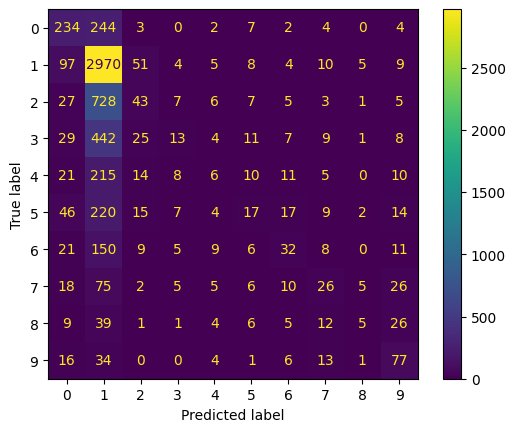

In [62]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest_clf = RandomForestClassifier()

In [65]:
cross_validation_report(forest_clf)

Avg: 0.3956396144750932
Std: 0.011404123885719658
Scores: [0.38414461 0.39854485 0.38135548 0.41733743 0.38784071 0.38779614
 0.39243563 0.39321575 0.39998051 0.41374503]


In [66]:
forest_clf.fit(X_train_processed, y_train)

RandomForestClassifier()

In [67]:
conf_m = confusion_matrix(y_test, forest_clf.predict(X_test_processed))

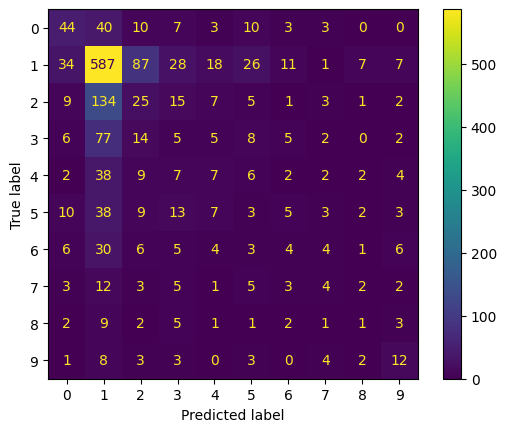

In [68]:
ConfusionMatrixDisplay(confusion_matrix=conf_m).plot()

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, forest_clf.predict(X_test_processed))

0.43358395989974935

In [71]:
f1_score(y_test, forest_clf.predict(X_test_processed), average='weighted')

0.4033341217966126

### K Nearest Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn_clf = KNeighborsClassifier()

In [74]:
cross_validation_report(knn_clf)

Avg: 0.4018763026143858
Std: 0.013222225284739724
Scores: [0.39013253 0.42095422 0.39344808 0.42078415 0.40738196 0.37792864
 0.39422511 0.39524748 0.40979666 0.4088642 ]


In [75]:
knn_clf.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [76]:
conf_m = confusion_matrix(y_test, knn_clf.predict(X_test_processed))

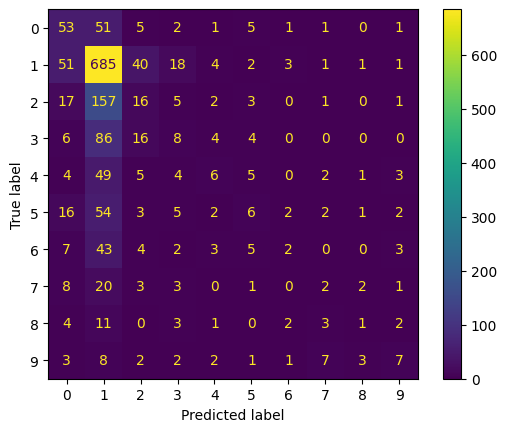

In [77]:
ConfusionMatrixDisplay(confusion_matrix=conf_m).plot()

In [78]:
accuracy_score(y_test, knn_clf.predict(X_test_processed))

0.4924812030075188

In [79]:
f1_score(y_test, knn_clf.predict(X_test_processed), average='weighted')

0.42117138265902193

# Sci-Kit Models - Regression

#### Create Training and Testing Sets

In [80]:
sk_regression = reformat_data()

In [81]:
X = sk_regression.drop(['rating'], axis=1)
y = sk_regression['rating']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [83]:
X_train.shape

(5888, 69)

In [84]:
y_train.shape

(5888,)

In [85]:
X_train_processed = full_pipeline.fit_transform(X_train)

In [86]:
X_test_processed = full_pipeline.transform(X_test)

In [87]:
def rmse_cross_validation(model):
    scores = cross_val_score(
        model, 
        X_train_processed, y_train,
        scoring='neg_mean_squared_error',
        cv=10
    )
    scores = np.sqrt(-scores)
    print('Avg:', scores.mean())
    print('Std:', scores.std())
    print('Scores:', scores)

### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lin_reg = LinearRegression()

In [90]:
rmse_cross_validation(lin_reg)

Avg: 1.646471223533835
Std: 0.06681651907649783
Scores: [1.64081757 1.69260467 1.68195886 1.63202569 1.71598984 1.54748954
 1.55226849 1.62852506 1.77013004 1.60290248]


### Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_reg = RandomForestRegressor()

In [93]:
rmse_cross_validation(forest_reg)

Avg: 1.6328663411578586
Std: 0.0658372185005234
Scores: [1.602869   1.61554274 1.6723265  1.53839738 1.63963388 1.55292208
 1.61954541 1.66246172 1.78829897 1.63666573]


### K Nearest Neighbors

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
knn_reg = KNeighborsRegressor()

In [96]:
rmse_cross_validation(knn_reg)

Avg: 1.8086943779356108
Std: 0.06069920397876369
Scores: [1.77314431 1.80884452 1.89173881 1.78896827 1.83654655 1.70693184
 1.74783883 1.84178993 1.91501408 1.77612664]


### Hypertuning - Random Forest

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = [{
    'n_estimators': [100, 200, 300],
}]

In [99]:
model = RandomForestRegressor(random_state=39)

In [100]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=5)

In [101]:
# grid_search.fit(X_train_processed, y_train)

In [102]:
# grid_search.best_params_
# n_estimators: 200

In [103]:
final_model = RandomForestRegressor(n_estimators=200)

In [104]:
final_model.fit(X_train_processed, y_train)

RandomForestRegressor(n_estimators=200)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
np.amax(final_model.predict(X_test_processed))

8.88

In [107]:
np.amin(final_model.predict(X_test_processed))

1.0

In [108]:
mean_squared_error(y_test, final_model.predict(X_test_processed), squared=False)

1.6715899203058964

In [109]:
r2_score(y_test, final_model.predict(X_test_processed))

0.3589461290304893

In [110]:
def sample_prediction(index, model):
    truth = y_test.values[index]
    prediction = model.predict(X_test_processed[index:index+1])
    print('Pred:', prediction)
    print('Truth:', truth)

In [111]:
for i in range(70, 90):
    sample_prediction(i, final_model)

Pred: [1.54]
Truth: 2
Pred: [1.01416667]
Truth: 3
Pred: [1.9775]
Truth: 1
Pred: [1.33]
Truth: 1
Pred: [1.38841667]
Truth: 1
Pred: [3.63028571]
Truth: 1
Pred: [1.41708333]
Truth: 1
Pred: [3.205]
Truth: 3
Pred: [2.4925]
Truth: 5
Pred: [4.0125]
Truth: 5
Pred: [1.72433333]
Truth: 1
Pred: [4.9185]
Truth: 5
Pred: [3.34825]
Truth: 2
Pred: [1.84]
Truth: 2
Pred: [4.095]
Truth: 9
Pred: [4.4725]
Truth: 3
Pred: [1.59733333]
Truth: 1
Pred: [1.03416667]
Truth: 1
Pred: [3.219]
Truth: 2
Pred: [1.00266667]
Truth: 1


In [112]:
conf_m = confusion_matrix(y_test, np.rint(final_model.predict(X_test_processed)))

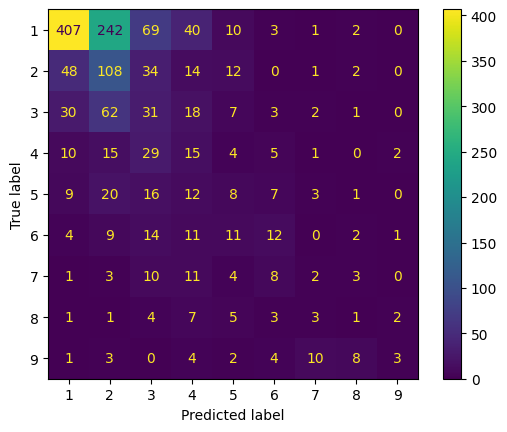

In [113]:
ConfusionMatrixDisplay(conf_m, display_labels=[1,2,3,4,5,6,7,8,9]).plot()

In [114]:
accuracy_score(y_test, np.rint(final_model.predict(X_test_processed)))

0.39877717391304346

### Hypertuning - KNN

In [115]:
param_grid = [{
    'n_neighbors': [5, 10, 30],
    'leaf_size': [1],
    'p': [1, 2],
}]

In [116]:
model = KNeighborsRegressor()

In [117]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=5)

In [118]:
# grid_search.fit(X_train_processed, y_train)

In [119]:
# grid_search.best_params_
# leaf_size: 1
# n_neighbors: 40
# p: 2

In [120]:
final_model = KNeighborsRegressor(leaf_size=1, n_neighbors=40, p=2)

In [121]:
final_model.fit(X_train_processed, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=40)

In [122]:
np.amax(final_model.predict(X_test_processed))

8.175

In [123]:
np.amin(final_model.predict(X_test_processed))

1.025

In [124]:
mean_squared_error(y_test, final_model.predict(X_test_processed), squared=False)

1.7036298862728882

In [125]:
r2_score(y_test, final_model.predict(X_test_processed))

0.33413599293136165

In [126]:
for i in range(90, 120):
    sample_prediction(i, final_model)

Pred: [1.9]
Truth: 1
Pred: [1.4]
Truth: 7
Pred: [1.6]
Truth: 2
Pred: [1.85]
Truth: 4
Pred: [2.4]
Truth: 1
Pred: [1.175]
Truth: 1
Pred: [1.3]
Truth: 1
Pred: [1.575]
Truth: 1
Pred: [1.475]
Truth: 1
Pred: [1.575]
Truth: 2
Pred: [1.85]
Truth: 2
Pred: [2.175]
Truth: 1
Pred: [1.75]
Truth: 1
Pred: [1.425]
Truth: 1
Pred: [1.625]
Truth: 2
Pred: [1.95]
Truth: 1
Pred: [3.1]
Truth: 4
Pred: [1.225]
Truth: 1
Pred: [7.825]
Truth: 1
Pred: [1.75]
Truth: 1
Pred: [1.35]
Truth: 2
Pred: [1.9]
Truth: 1
Pred: [1.975]
Truth: 1
Pred: [2.45]
Truth: 1
Pred: [3.075]
Truth: 5
Pred: [2.2]
Truth: 1
Pred: [2.2]
Truth: 3
Pred: [2.45]
Truth: 1
Pred: [2.325]
Truth: 3
Pred: [2.525]
Truth: 1


In [127]:
conf_m = confusion_matrix(y_test, np.rint(final_model.predict(X_test_processed)))

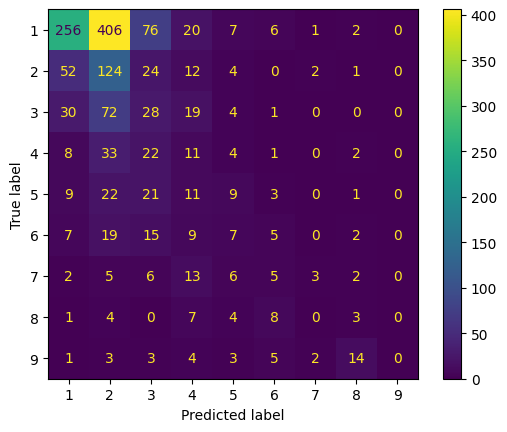

In [128]:
ConfusionMatrixDisplay(conf_m, display_labels=[1,2,3,4,5,6,7,8,9]).plot()

In [129]:
accuracy_score(y_test, np.rint(final_model.predict(X_test_processed)))

0.2982336956521739